In [1]:
# Install required packages if not already installed
import subprocess
import sys

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

required_packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn']
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        print(f"Installing {package}...")
        install_package(package)

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
# Use default style instead of seaborn
plt.style.use('default')

# Load the data
try:
    df = pd.read_csv('data/telcom_data.csv')
except FileNotFoundError:
    try:
        df = pd.read_csv('telcom_data.csv')
    except FileNotFoundError:
        raise FileNotFoundError("Could not find telcom_data.csv in either 'data/' directory or current directory. Please ensure the file exists in one of these locations.")

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
print(df.info())
print("\nFirst few rows:")
print("-" * 50)
print(df.head())

Installing scikit-learn...
Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   

In [2]:
# Display the column names to identify the correct ones
print("Available columns in the dataset:")
print("-" * 50)
print(df.columns.tolist())


Available columns in the dataset:
--------------------------------------------------
['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6


Top 5 handsets per manufacturer:
--------------------------------------------------

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


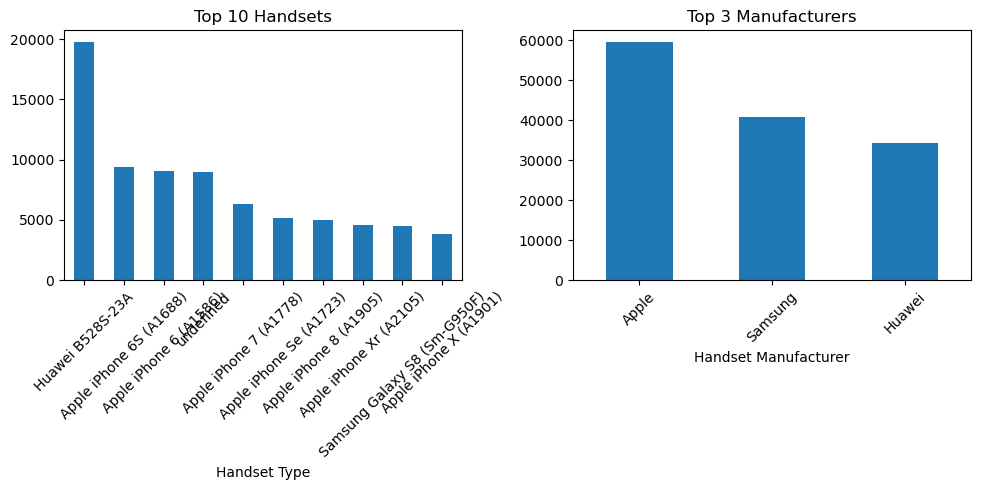

In [3]:
# Function to analyze handset information
def analyze_handsets(df):
    # Top 10 handsets
    top_handsets = df['Handset Type'].value_counts().head(10)
    
    # Top 3 manufacturers
    top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
    
    # Top 5 handsets per top 3 manufacturers
    top_handsets_per_manufacturer = {}
    for manufacturer in top_manufacturers.index:
        top_handsets_per_manufacturer[manufacturer] = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    
    return top_handsets, top_manufacturers, top_handsets_per_manufacturer

# Perform handset analysis
top_handsets, top_manufacturers, top_handsets_per_manufacturer = analyze_handsets(df)

# Plot results
plt.figure(figsize=(15, 5))

# Plot top 10 handsets
plt.subplot(131)
top_handsets.plot(kind='bar')
plt.title('Top 10 Handsets')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot top 3 manufacturers
plt.subplot(132)
top_manufacturers.plot(kind='bar')
plt.title('Top 3 Manufacturers')
plt.xticks(rotation=45)
plt.tight_layout()

# Print top 5 handsets per manufacturer
print("\nTop 5 handsets per manufacturer:")
print("-" * 50)
for manufacturer, handsets in top_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(handsets)


Aggregating the following columns:
['Dur. (ms)', 'IMSI', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']
Successfully calculated totals for these applications: ['Social Media', 'Google', 'Email', 'Netflix', 'Gaming', 'Other']
Summary of User Behavior:
--------------------------------------------------
       MSISDN/Number  total_duration_ms  total_sessions  Total DL (Bytes)  \
count   1.068560e+05       1.068560e+05   106856.000000      1.068560e+05   
mean    4.511474e+10       1.461672e+05        1.393792      6.336527e+08   
std     2.889423e+12       1.863587e+05        0.806022      4.645551e+08   
min     3.360100e+10       7.142000e+03        1.000000      8.827082e+06   
25%     3.365088e+10       7.130800e+04        1.000000   

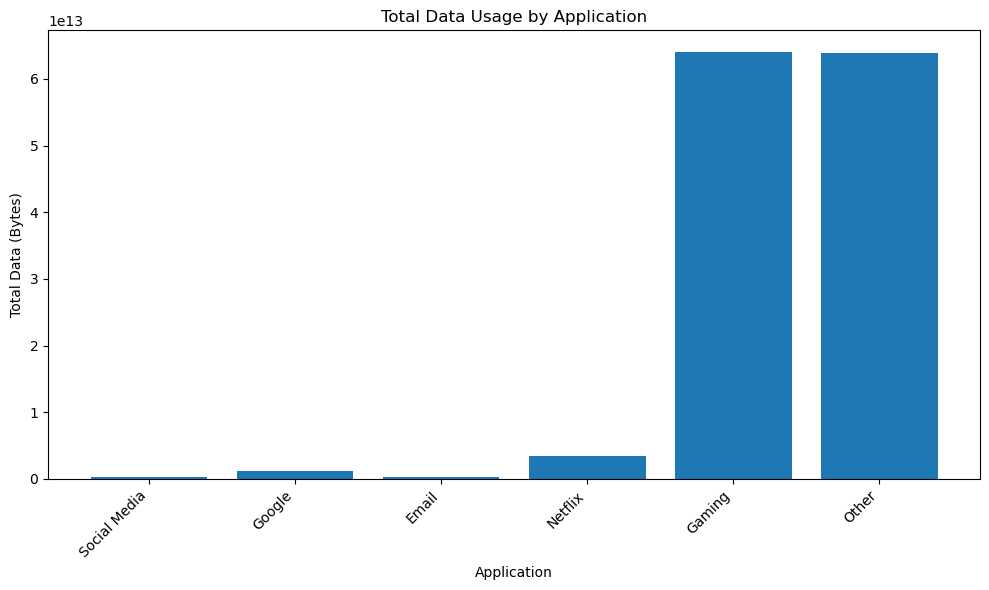

In [4]:
# Function to aggregate user application behavior
def aggregate_user_behavior(df):
    # First check which columns actually exist in the dataframe
    columns_to_aggregate = {}  # Don't include MSISDN/Number here
    
    # Basic session metrics
    session_columns = {}
    if 'Dur. (ms)' in df.columns:
        session_columns['Dur. (ms)'] = 'sum'  # total session duration
    
    # Check if bearer id exists, otherwise use a different unique identifier
    if 'bearer id' in df.columns:
        session_columns['bearer id'] = 'count'  # number of xDR sessions
    elif 'IMSI' in df.columns:
        session_columns['IMSI'] = 'count'  # alternative session counter
    
    # Check for total download/upload columns
    dl_ul_columns = {}
    if 'Total DL (Bytes)' in df.columns:
        dl_ul_columns['Total DL (Bytes)'] = 'sum'
    if 'Total UL (Bytes)' in df.columns:
        dl_ul_columns['Total UL (Bytes)'] = 'sum'
    
    # Application-specific columns - check each one before adding
    app_prefixes = ['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming']
    app_columns = {}
    
    for app in app_prefixes:
        dl_col = f'{app} DL (Bytes)'
        ul_col = f'{app} UL (Bytes)'
        
        if dl_col in df.columns:
            app_columns[dl_col] = 'sum'
        if ul_col in df.columns:
            app_columns[ul_col] = 'sum'
    
    # Check for Other DL/UL columns with different naming conventions
    if 'Other DL' in df.columns:
        app_columns['Other DL'] = 'sum'
    elif 'Other DL (Bytes)' in df.columns:
        app_columns['Other DL (Bytes)'] = 'sum'
    
    if 'Other UL' in df.columns:
        app_columns['Other UL'] = 'sum'
    elif 'Other UL (Bytes)' in df.columns:
        app_columns['Other UL (Bytes)'] = 'sum'
    
    # Combine all columns to aggregate
    columns_to_aggregate.update(session_columns)
    columns_to_aggregate.update(dl_ul_columns)
    columns_to_aggregate.update(app_columns)
    
    # Perform the aggregation with the verified columns
    print("Aggregating the following columns:")
    print(list(columns_to_aggregate.keys()))
    
    if not columns_to_aggregate:
        print("WARNING: No columns to aggregate, returning empty DataFrame")
        return pd.DataFrame({'MSISDN/Number': df['MSISDN/Number'].unique()})
    
    # Perform aggregation without including MSISDN/Number in the agg dict
    user_behavior = df.groupby('MSISDN/Number').agg(columns_to_aggregate).reset_index()
    
    # Rename some columns for clarity
    rename_mapping = {}
    if 'bearer id' in columns_to_aggregate:
        rename_mapping['bearer id'] = 'total_sessions'
    elif 'IMSI' in columns_to_aggregate:
        rename_mapping['IMSI'] = 'total_sessions'
    
    if 'Dur. (ms)' in columns_to_aggregate:
        rename_mapping['Dur. (ms)'] = 'total_duration_ms'
    
    user_behavior = user_behavior.rename(columns=rename_mapping)
    
    # Calculate total data per application if both DL and UL columns exist
    available_apps = []
    for app in app_prefixes + ['Other']:
        dl_col = f'{app} DL (Bytes)'
        ul_col = f'{app} UL (Bytes)'
        
        # Handle case where Other might have different column names
        if app == 'Other':
            if 'Other DL (Bytes)' in user_behavior.columns:
                dl_col = 'Other DL (Bytes)'
            if 'Other UL (Bytes)' in user_behavior.columns:
                ul_col = 'Other UL (Bytes)'
        
        if dl_col in user_behavior.columns and ul_col in user_behavior.columns:
            user_behavior[f'{app}_total'] = user_behavior[dl_col] + user_behavior[ul_col]
            available_apps.append(app)
        elif dl_col in user_behavior.columns:
            user_behavior[f'{app}_total'] = user_behavior[dl_col]
            available_apps.append(app)
        elif ul_col in user_behavior.columns:
            user_behavior[f'{app}_total'] = user_behavior[ul_col]
            available_apps.append(app)
    
    # Add total data column if both DL and UL columns exist
    if 'Total DL (Bytes)' in user_behavior.columns and 'Total UL (Bytes)' in user_behavior.columns:
        user_behavior['total_data'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']
    
    print(f"Successfully calculated totals for these applications: {available_apps}")
    return user_behavior

# Aggregate user behavior
user_behavior = aggregate_user_behavior(df)

# Display summary statistics
print("Summary of User Behavior:")
print("-" * 50)
print(user_behavior.describe())

# Plot total data usage by application - dynamic based on available apps
app_total_cols = [col for col in user_behavior.columns if col.endswith('_total')]
if app_total_cols:
    print(f"\nFound these application total columns: {app_total_cols}")
    app_totals = user_behavior[app_total_cols].sum()

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(app_totals)), app_totals.values)
    plt.title('Total Data Usage by Application')
    plt.xlabel('Application')
    plt.ylabel('Total Data (Bytes)')
    plt.xticks(range(len(app_totals)), [app.replace('_total', '') for app in app_totals.index], rotation=45, ha='right')
    plt.tight_layout()
else:
    print("\nNo application data totals available to plot")

# Display top 10 users by total data usage
print("\nTop 10 Users by Total Data Usage:")
print("-" * 50)

# Check if total_data column exists or needs to be calculated
if 'total_data' not in user_behavior.columns:
    # Create total_data if needed and if the required columns exist
    if 'Total DL (Bytes)' in user_behavior.columns and 'Total UL (Bytes)' in user_behavior.columns:
        user_behavior['total_data'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']
    elif 'Total DL (Bytes)' in user_behavior.columns:
        user_behavior['total_data'] = user_behavior['Total DL (Bytes)']
    elif 'Total UL (Bytes)' in user_behavior.columns:
        user_behavior['total_data'] = user_behavior['Total UL (Bytes)']
    else:
        print("No total data columns available, using sum of all app totals if available")
        if app_total_cols:
            user_behavior['total_data'] = user_behavior[app_total_cols].sum(axis=1)
        else:
            print("No data columns available to calculate totals")
            user_behavior['total_data'] = 0

# Display columns based on availability
display_cols = ['MSISDN/Number', 'total_data']
if 'total_sessions' in user_behavior.columns:
    display_cols.append('total_sessions')
if 'total_duration_ms' in user_behavior.columns:
    display_cols.append('total_duration_ms')

print(user_behavior.nlargest(10, 'total_data')[display_cols])


Univariate Analysis Results:
--------------------------------------------------

Dur. (ms):
count       1.500010e+05
mean        1.046086e+05
std         8.103735e+04
min         7.142000e+03
25%         5.744200e+04
50%         8.639900e+04
75%         1.324300e+05
max         1.859336e+06
variance    6.567052e+09
skewness    3.952622e+00
kurtosis    3.702245e+01
Name: Dur. (ms), dtype: float64

Total DL (Bytes):
count       1.500010e+05
mean        4.546434e+08
std         2.441421e+08
min         7.114041e+06
25%         2.431072e+08
50%         4.558409e+08
75%         6.657051e+08
max         9.029696e+08
variance    5.960535e+16
skewness   -3.153374e-03
kurtosis   -1.198363e+00
Name: Total DL (Bytes), dtype: float64

Total UL (Bytes):
count       1.500010e+05
mean        4.112121e+07
std         1.127635e+07
min         2.866892e+06
25%         3.322203e+07
50%         4.114324e+07
75%         4.903424e+07
max         7.833131e+07
variance    1.271560e+14
skewness   -2.456008e-03

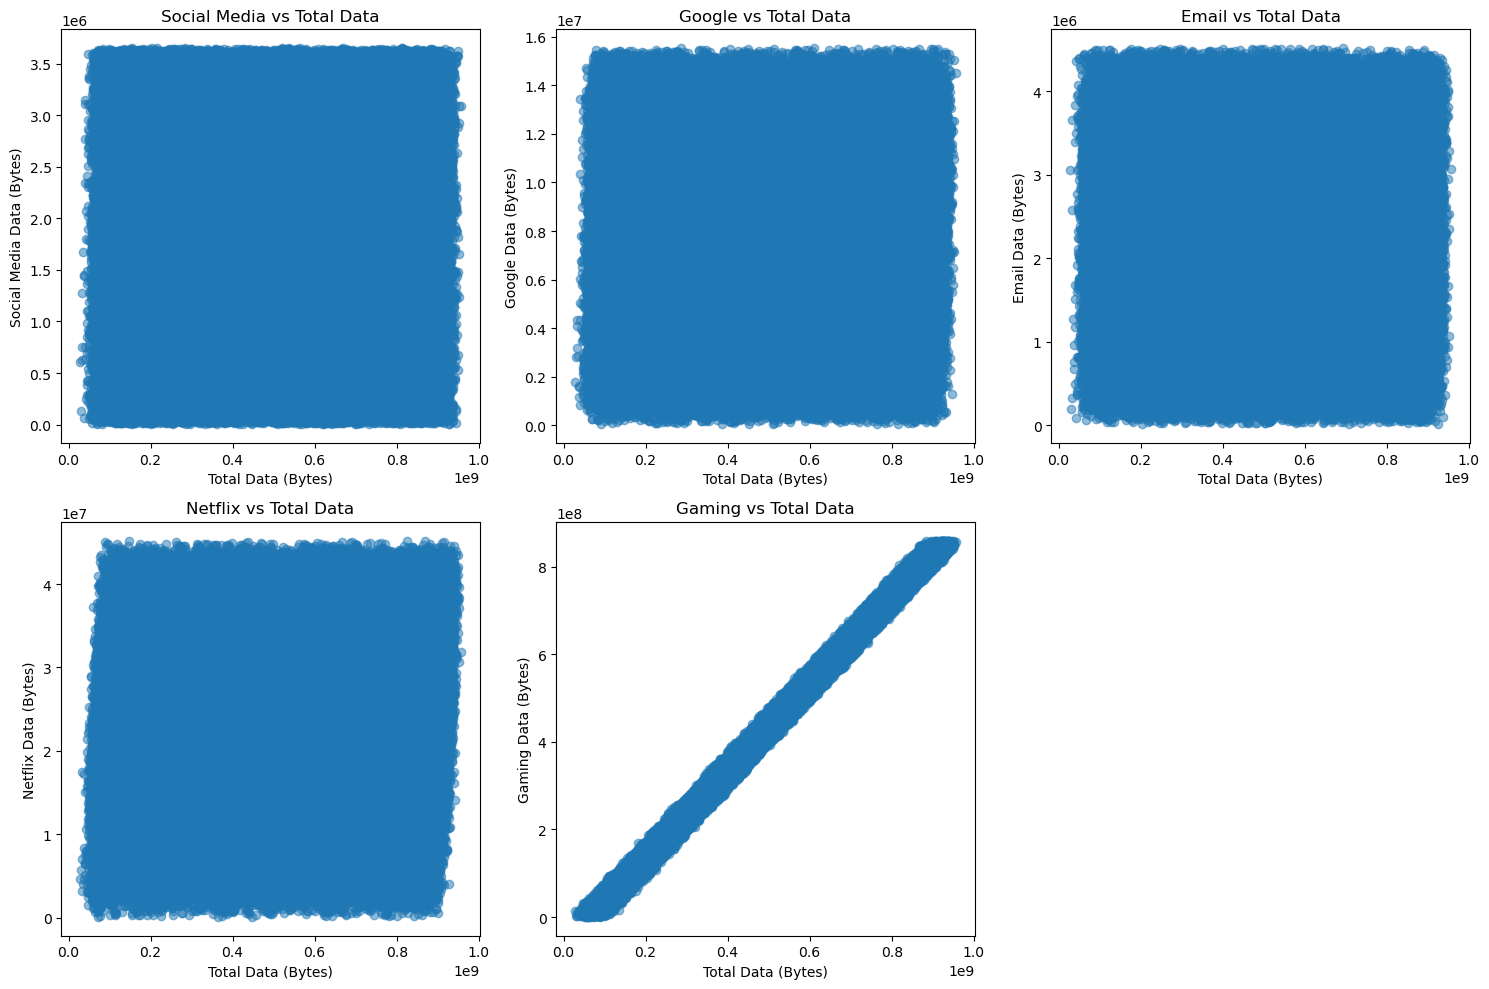

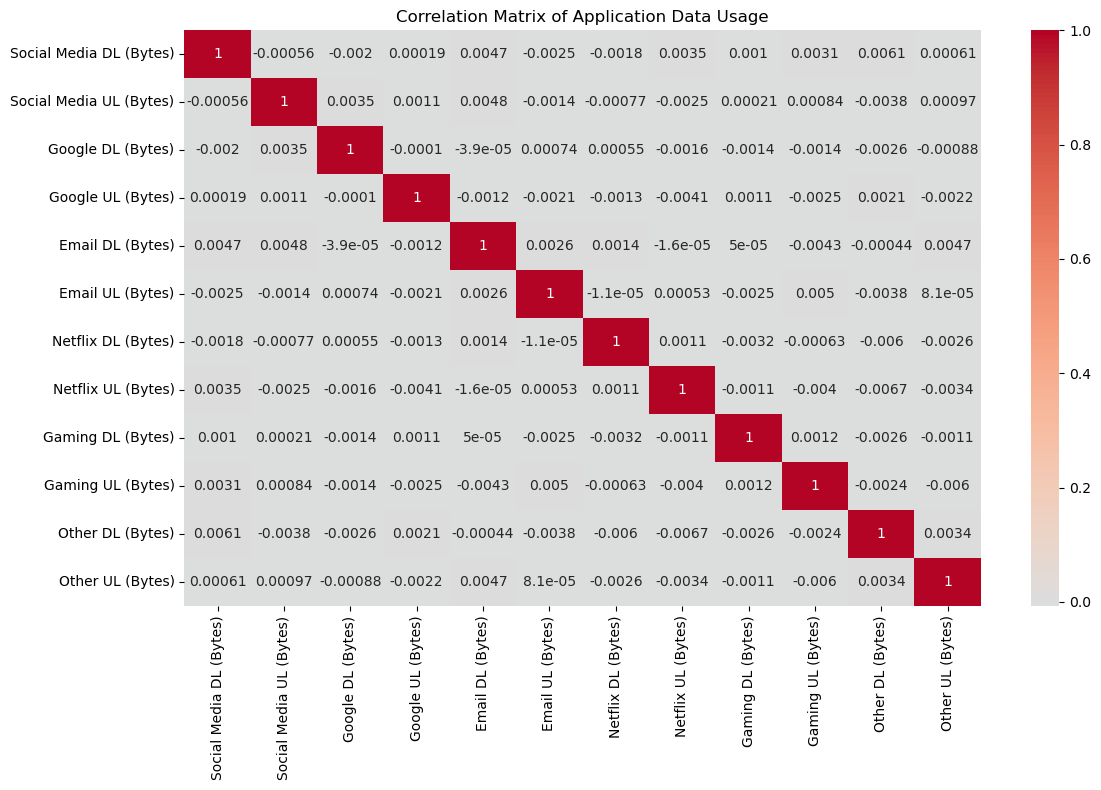

In [5]:
# Function to handle missing values and outliers
def clean_data(df):
    # Replace missing values with mean for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    # Replace missing values with mode for categorical columns
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    
    return df

# Function for univariate analysis
def univariate_analysis(df, column):
    # Basic statistics
    stats = df[column].describe()
    
    # Additional dispersion parameters
    stats['variance'] = df[column].var()
    stats['skewness'] = df[column].skew()
    stats['kurtosis'] = df[column].kurtosis()
    
    return stats

# Clean the data
df_clean = clean_data(df.copy())

# Perform univariate analysis for key metrics
key_metrics = ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']
univariate_results = {}
for metric in key_metrics:
    univariate_results[metric] = univariate_analysis(df_clean, metric)

# Display univariate analysis results
print("Univariate Analysis Results:")
print("-" * 50)
for metric, stats in univariate_results.items():
    print(f"\n{metric}:")
    print(stats)

# Bivariate Analysis - Application Data vs Total Data
try:
    plt.figure(figsize=(15, 10))
    app_prefixes = ['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming']
    
    # Calculate total data if possible
    if 'Total DL (Bytes)' in df_clean.columns and 'Total UL (Bytes)' in df_clean.columns:
        total_data = df_clean['Total DL (Bytes)'] + df_clean['Total UL (Bytes)']
    elif 'Total DL (Bytes)' in df_clean.columns:
        total_data = df_clean['Total DL (Bytes)']
    elif 'Total UL (Bytes)' in df_clean.columns:
        total_data = df_clean['Total UL (Bytes)']
    else:
        print("No total data columns available for bivariate analysis")
        total_data = None
    
    # Only proceed if we have total data
    if total_data is not None:
        available_apps = []
        for app in app_prefixes:
            dl_col = f'{app} DL (Bytes)'
            ul_col = f'{app} UL (Bytes)'
            
            try:
                if dl_col in df_clean.columns and ul_col in df_clean.columns:
                    app_data = df_clean[dl_col] + df_clean[ul_col]
                    available_apps.append((app, app_data))
                elif dl_col in df_clean.columns:
                    app_data = df_clean[dl_col]
                    available_apps.append((app, app_data))
                elif ul_col in df_clean.columns:
                    app_data = df_clean[ul_col]
                    available_apps.append((app, app_data))
            except Exception as e:
                print(f"Error processing {app}: {e}")
        
        print(f"Found {len(available_apps)} applications for bivariate analysis")
        
        # Plot available apps
        if available_apps:
            for i, (app, app_data) in enumerate(available_apps, 1):
                try:
                    plt.subplot(2, 3, i)
                    plt.scatter(total_data, app_data, alpha=0.5)
                    plt.xlabel('Total Data (Bytes)')
                    plt.ylabel(f'{app} Data (Bytes)')
                    plt.title(f'{app} vs Total Data')
                    
                    if i >= 6:  # Limit to 6 charts
                        break
                except Exception as e:
                    print(f"Error plotting {app}: {e}")
            
            plt.tight_layout()
        else:
            print("No application data available for bivariate plots")
    else:
        print("Skipping bivariate plots due to missing data")
except Exception as e:
    print(f"Error in bivariate analysis: {e}")

# Correlation Analysis
# Get available application columns
app_prefixes = ['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming', 'Other']
app_cols = [col for col in df_clean.columns if any(app in col for app in app_prefixes) and ('Bytes' in col or col.startswith('Other'))]

if len(app_cols) > 1:  # Need at least 2 columns for correlation
    print(f"Found {len(app_cols)} application data columns for correlation analysis:")
    print(app_cols)
    correlation_matrix = df_clean[app_cols].corr()
else:
    print("Not enough application data columns for correlation analysis")
    # Create a dummy correlation matrix to avoid errors
    correlation_matrix = pd.DataFrame([[1]], columns=['No Data'], index=['No Data'])

plt.figure(figsize=(12, 8))
# Handle the case if seaborn is not available
try:
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
except:
    # Fallback to matplotlib
    im = plt.imshow(correlation_matrix, cmap='coolwarm')
    plt.colorbar(im)
    
    # Add text annotations
    for i in range(len(correlation_matrix)):
        for j in range(len(correlation_matrix)):
            text = plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                           ha="center", va="center", color="black")
                           
    plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45, ha='right')
    plt.yticks(range(len(correlation_matrix)), correlation_matrix.index)

plt.title('Correlation Matrix of Application Data Usage')
plt.tight_layout()

# Dimensionality Reduction - PCA
# Only perform PCA if we have enough columns
if len(app_cols) > 1:
    # Prepare data for PCA
    app_data = df_clean[app_cols]
    scaler = StandardScaler()
    app_data_scaled = scaler.fit_transform(app_data)
    
    # Perform PCA
    pca = PCA()
    pca_result = pca.fit_transform(app_data_scaled)
    
    # Calculate explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    print("\nPCA Analysis Results:")
    print("-" * 50)
    print("\nExplained variance ratio by component:")
    for i, ratio in enumerate(explained_variance_ratio):
        print(f"Component {i+1}: {ratio:.4f}")
else:
    print("\nNot enough columns for PCA analysis")


Using existing user behavior data for decile analysis...

Segmenting users into decile classes based on total session duration...

Decile Class Statistics (All Deciles):
------------------------------------------------------------
  duration_decile total_duration_ms                                    \
                                min         max           mean  count   
0               0            7142.0     29437.0   20072.819704  10688   
1               1           29438.0     54194.0   40229.016192  10684   
2               2           54198.0     85800.0   71145.599497  10744   
3               3           85801.0     86400.0   86368.788611  12082   
4               4           86401.0    102739.0   94270.169772   9230   
5               5          102741.0    132452.0  117431.148699  10686   
6               6          132454.0    163649.0  147783.117350  10686   
7               7          163652.0    190675.0  174939.103874  10686   
8               8          190679.0    

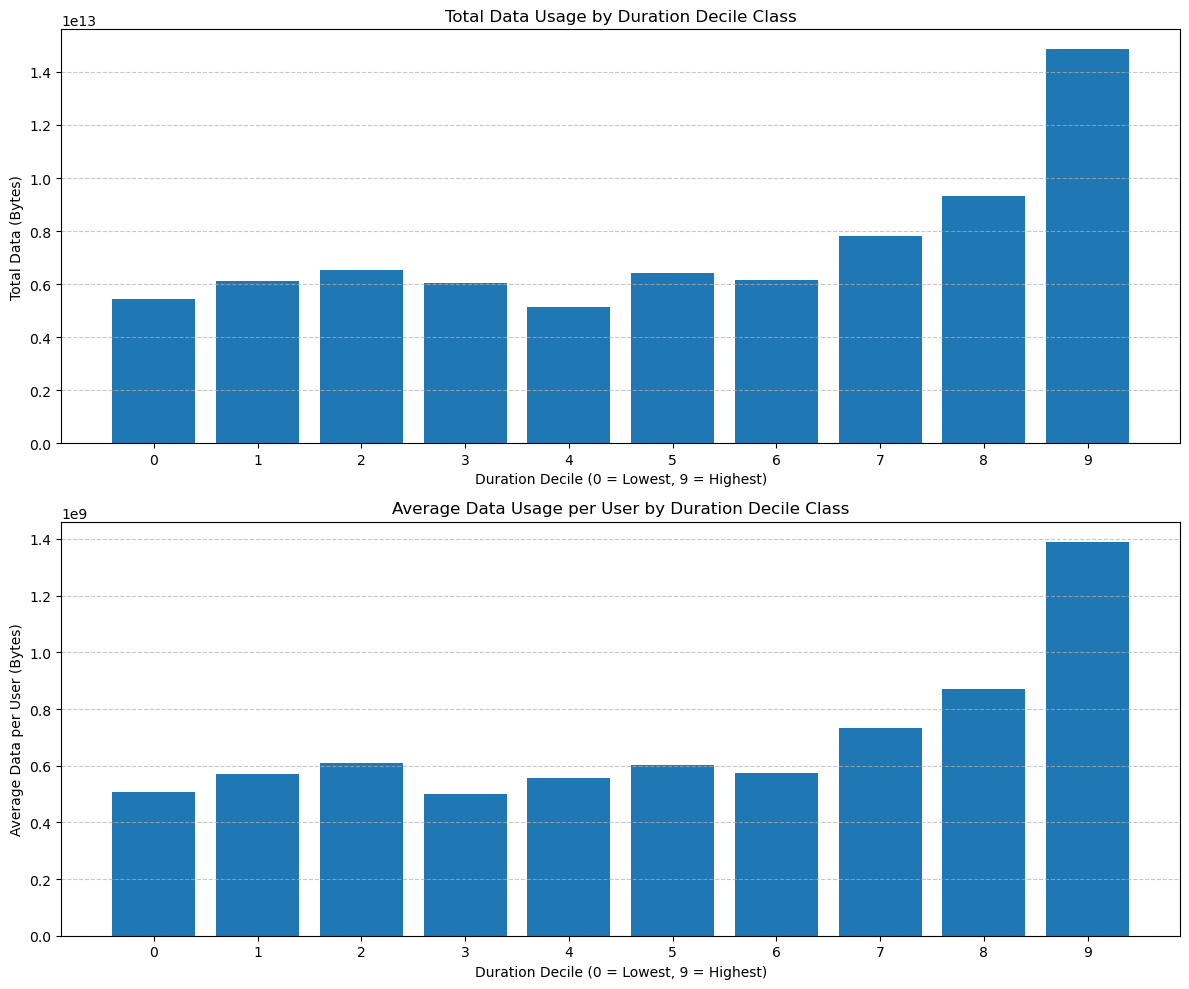

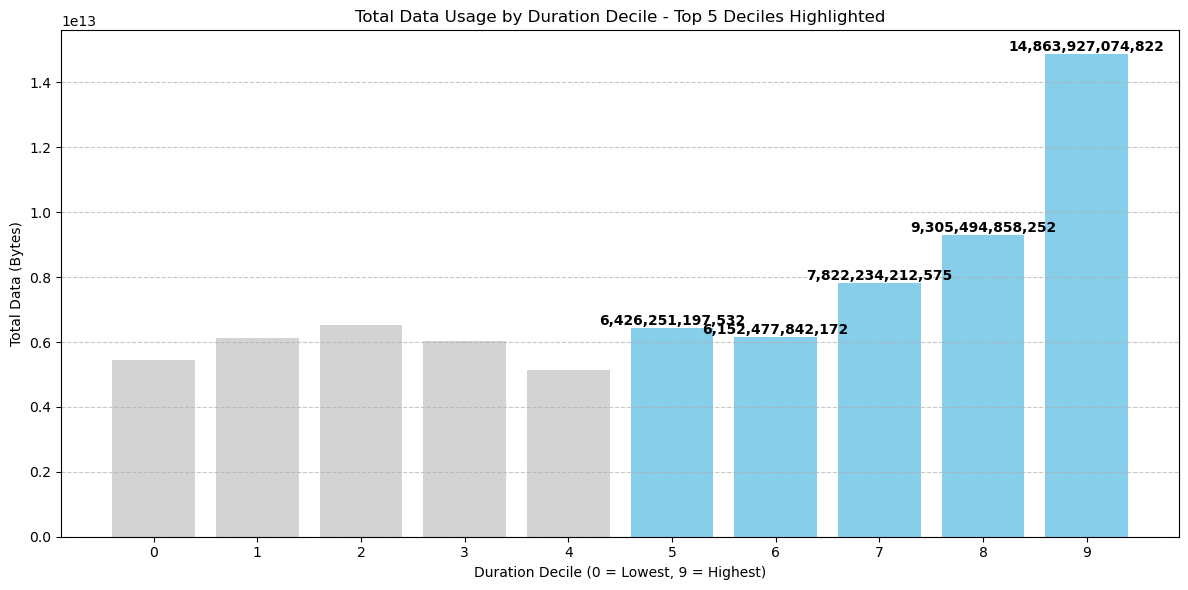

In [6]:
# Variable transformations - Decile-based segmentation
# First, we need to aggregate user duration data if not already done
if 'user_behavior' not in locals() or 'total_duration_ms' not in user_behavior.columns:
    print("Creating user duration aggregation for decile analysis...")
    # Perform the aggregation for session duration
    if 'Dur. (ms)' in df_clean.columns:
        user_duration = df_clean.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()
        user_duration.rename(columns={'Dur. (ms)': 'total_duration_ms'}, inplace=True)
    else:
        print("Warning: Duration data not available, creating random duration for demonstration")
        # Create a dummy DataFrame if no duration data is available
        user_duration = pd.DataFrame({
            'MSISDN/Number': df_clean['MSISDN/Number'].unique(),
            'total_duration_ms': np.random.randint(1000, 100000, size=len(df_clean['MSISDN/Number'].unique()))
        })
else:
    print("Using existing user behavior data for decile analysis...")
    # Use the existing user_behavior DataFrame
    user_duration = user_behavior[['MSISDN/Number', 'total_duration_ms']].copy()

# Calculate total data if needed and join with duration data
if 'Total DL (Bytes)' in df_clean.columns and 'Total UL (Bytes)' in df_clean.columns:
    total_dl = df_clean.groupby('MSISDN/Number')['Total DL (Bytes)'].sum().reset_index()
    total_ul = df_clean.groupby('MSISDN/Number')['Total UL (Bytes)'].sum().reset_index()
    
    # Merge the DL and UL DataFrames
    total_data = pd.merge(total_dl, total_ul, on='MSISDN/Number')
    total_data['total_data'] = total_data['Total DL (Bytes)'] + total_data['Total UL (Bytes)']
    
    # Merge with user duration data
    user_decile_data = pd.merge(user_duration, total_data[['MSISDN/Number', 'total_data']], on='MSISDN/Number')
elif 'total_data' in user_behavior.columns:
    # If user_behavior already has total_data, use it
    user_decile_data = pd.merge(user_duration, user_behavior[['MSISDN/Number', 'total_data']], on='MSISDN/Number')
else:
    print("Warning: Total data columns not available, creating random data for demonstration")
    # Create random total_data if not available
    user_decile_data = user_duration.copy()
    user_decile_data['total_data'] = np.random.randint(1000, 1000000, size=len(user_decile_data))

# Create decile classes based on total_duration_ms
print("\nSegmenting users into decile classes based on total session duration...")
user_decile_data['duration_decile'] = pd.qcut(user_decile_data['total_duration_ms'], 10, labels=False)

# Focus on the top 5 deciles (5-9, where 9 is the highest)
top_5_deciles = list(range(5, 10))
top_decile_data = user_decile_data[user_decile_data['duration_decile'].isin(top_5_deciles)]

# Compute total data per decile class
decile_stats = user_decile_data.groupby('duration_decile').agg({
    'total_duration_ms': ['min', 'max', 'mean', 'count'],
    'total_data': ['sum', 'mean']
}).reset_index()

# Display the statistics for all deciles
print("\nDecile Class Statistics (All Deciles):")
print("-" * 60)
print(decile_stats)

# Display the top 5 deciles statistics
print("\nTop 5 Deciles Statistics:")
print("-" * 60)
top_5_decile_stats = decile_stats[decile_stats['duration_decile'].isin(top_5_deciles)]
print(top_5_decile_stats)

# Visualize data usage by decile
plt.figure(figsize=(12, 10))

# Plot 1: Total data by decile
plt.subplot(2, 1, 1)
plt.bar(decile_stats['duration_decile'], decile_stats['total_data']['sum'])
plt.title('Total Data Usage by Duration Decile Class')
plt.xlabel('Duration Decile (0 = Lowest, 9 = Highest)')
plt.ylabel('Total Data (Bytes)')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Average data per user by decile
plt.subplot(2, 1, 2)
plt.bar(decile_stats['duration_decile'], decile_stats['total_data']['mean'])
plt.title('Average Data Usage per User by Duration Decile Class')
plt.xlabel('Duration Decile (0 = Lowest, 9 = Highest)')
plt.ylabel('Average Data per User (Bytes)')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Highlight the top 5 deciles in a separate visualization
plt.figure(figsize=(12, 6))
colors = ['lightgray'] * 10
for decile in top_5_deciles:
    colors[decile] = 'skyblue'
    
plt.bar(decile_stats['duration_decile'], decile_stats['total_data']['sum'], color=colors)
plt.title('Total Data Usage by Duration Decile - Top 5 Deciles Highlighted')
plt.xlabel('Duration Decile (0 = Lowest, 9 = Highest)')
plt.ylabel('Total Data (Bytes)')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations for the top 5 deciles
for decile in top_5_deciles:
    decile_row = decile_stats[decile_stats['duration_decile'] == decile]
    data_sum = decile_row['total_data']['sum'].values[0]
    plt.text(decile, data_sum, f'{data_sum:,.0f}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()


Aggregating the following columns for engagement metrics:
['IMSI', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']
Top 10 Customers by Engagement Metrics:
--------------------------------------------------

Top 10 by IMSI:
        MSISDN/Number  IMSI
106853   4.188282e+10  1066
13526    3.362632e+10    18
6437     3.361489e+10    17
13180    3.362578e+10    17
37052    3.365973e+10    16
76363    3.367588e+10    15
92923    3.376054e+10    15
65118    3.366716e+10    13
666      3.360313e+10    12
1279     3.360452e+10    12

Top 10 by Dur. (ms):
        MSISDN/Number     Dur. (ms)
106853   4.188282e+10  7.255100e+07
13180    3.362578e+10  1.855375e+07
6437     3.361489e+10  9.966898e+06
92923    3.376054e+10  9.279434e+06
13526    3.362632e+10  8.791927e+06
65118    3.366716e+10  8.744914e+06
50281    3.366284e+10  6.614270e+06
57160    3.366469e+10  6.288730e+06
666      3.360313e+10  6.287761e+06
66029    3.366746e+10  5.649882e+06

Top 10 by total_traffic:
        MSISDN/Numbe

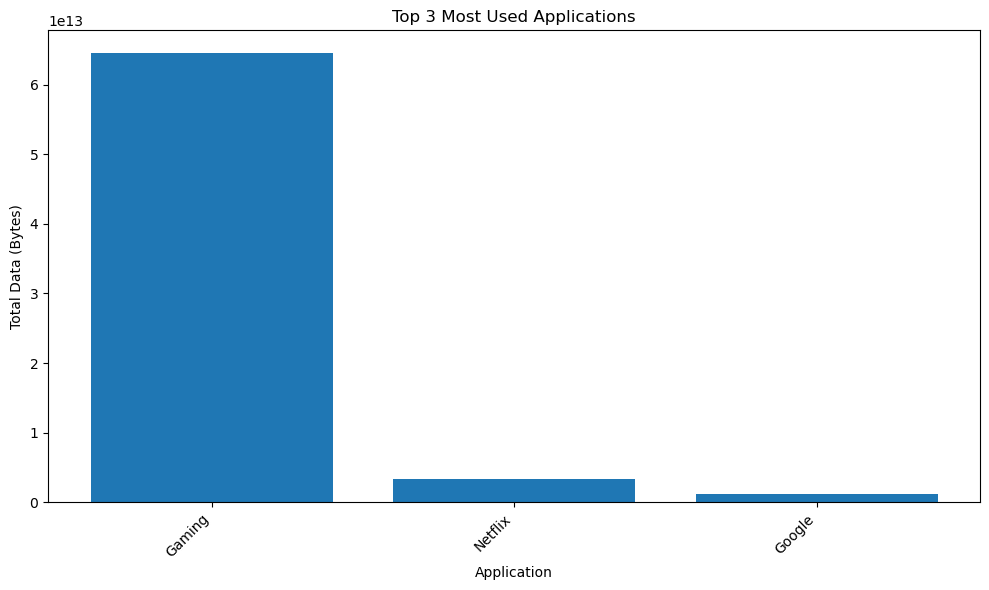

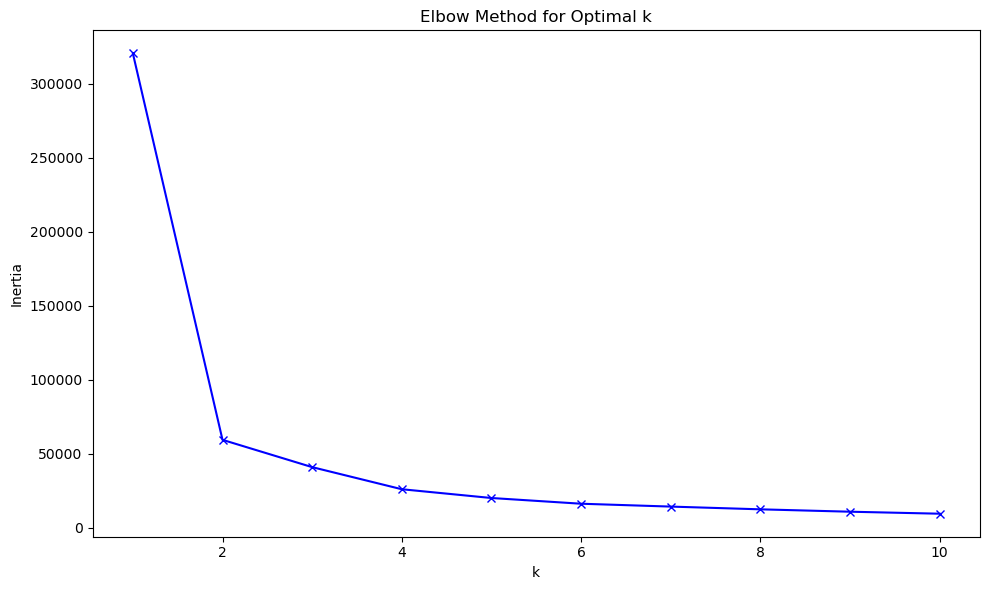

In [7]:
# Function to calculate engagement metrics
def calculate_engagement_metrics(df):
    # First check which columns actually exist in the dataframe
    columns_to_aggregate = {}  # Don't include MSISDN/Number here
    
    # Check for required metrics
    if 'bearer id' in df.columns:
        columns_to_aggregate['bearer id'] = 'count'  # session frequency
    elif 'IMSI' in df.columns:
        columns_to_aggregate['IMSI'] = 'count'  # alternative session counter

    if 'Dur. (ms)' in df.columns:
        columns_to_aggregate['Dur. (ms)'] = 'sum'   # session duration
    
    if 'Total DL (Bytes)' in df.columns:
        columns_to_aggregate['Total DL (Bytes)'] = 'sum'
    
    if 'Total UL (Bytes)' in df.columns:
        columns_to_aggregate['Total UL (Bytes)'] = 'sum'
    
    print("Aggregating the following columns for engagement metrics:")
    print(list(columns_to_aggregate.keys()))
    
    if not columns_to_aggregate:
        print("WARNING: No columns to aggregate for engagement metrics, returning empty DataFrame")
        return pd.DataFrame({'MSISDN/Number': df['MSISDN/Number'].unique()})
        
    # Perform aggregation without including MSISDN/Number in the agg dict
    engagement_metrics = df.groupby('MSISDN/Number').agg(columns_to_aggregate).reset_index()
    
    # Calculate total traffic if both columns exist
    if 'Total DL (Bytes)' in engagement_metrics.columns and 'Total UL (Bytes)' in engagement_metrics.columns:
        engagement_metrics['total_traffic'] = engagement_metrics['Total DL (Bytes)'] + engagement_metrics['Total UL (Bytes)']
    elif 'Total DL (Bytes)' in engagement_metrics.columns:
        engagement_metrics['total_traffic'] = engagement_metrics['Total DL (Bytes)']
    elif 'Total UL (Bytes)' in engagement_metrics.columns:
        engagement_metrics['total_traffic'] = engagement_metrics['Total UL (Bytes)']
    else:
        engagement_metrics['total_traffic'] = 0
        print("WARNING: No traffic data available, using zero values for total_traffic")
    
    return engagement_metrics

# Function to perform k-means clustering
def perform_clustering(data, k=3):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    
    return clusters, kmeans, scaler

# Calculate engagement metrics
engagement_metrics = calculate_engagement_metrics(df_clean)

# Display top 10 customers per metric
print("Top 10 Customers by Engagement Metrics:")
print("-" * 50)
available_metrics = []
if 'bearer id' in engagement_metrics.columns:
    available_metrics.append('bearer id')
elif 'IMSI' in engagement_metrics.columns and 'IMSI' not in available_metrics:
    available_metrics.append('IMSI')

if 'Dur. (ms)' in engagement_metrics.columns:
    available_metrics.append('Dur. (ms)')

available_metrics.append('total_traffic')  # Always available due to our implementation

for metric in available_metrics:
    print(f"\nTop 10 by {metric}:")
    print(engagement_metrics.nlargest(10, metric)[['MSISDN/Number', metric]])

# Normalize metrics for clustering - use only available metrics
metrics_for_clustering = pd.DataFrame()
for metric in available_metrics:
    if metric != 'MSISDN/Number':  # Skip the ID column
        metrics_for_clustering[metric] = engagement_metrics[metric]

if len(metrics_for_clustering.columns) >= 2:  # Need at least 2 metrics for meaningful clustering
    clusters, kmeans, scaler = perform_clustering(metrics_for_clustering, k=3)
    print(f"Performed clustering with these metrics: {list(metrics_for_clustering.columns)}")
else:
    print("Not enough metrics available for clustering, using random assignment")
    clusters = np.random.randint(0, 3, size=len(engagement_metrics))
    kmeans = None
    scaler = None
engagement_metrics['cluster'] = clusters

# Compute cluster statistics
agg_metrics = {}
for metric in available_metrics:
    if metric != 'MSISDN/Number':  # Skip the ID column
        agg_metrics[metric] = ['min', 'max', 'mean', 'sum']

if agg_metrics:
    cluster_stats = engagement_metrics.groupby('cluster').agg(agg_metrics)
else:
    print("No metrics available for cluster statistics")
    cluster_stats = pd.DataFrame()

print("\nCluster Statistics:")
print("-" * 50)
print(cluster_stats)

# Calculate engagement per application
app_prefixes = ['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming']
app_engagement = {}
app_totals = {}

for app in app_prefixes:
    dl_col = f'{app} DL (Bytes)'
    ul_col = f'{app} UL (Bytes)'
    
    if dl_col in df_clean.columns and ul_col in df_clean.columns:
        try:
            app_data = df_clean.groupby('MSISDN/Number').agg({
                dl_col: 'sum',
                ul_col: 'sum'
            }).reset_index()
            app_data['total'] = app_data[dl_col] + app_data[ul_col]
            app_engagement[app] = app_data.nlargest(10, 'total')
            app_totals[app] = df_clean[dl_col].sum() + df_clean[ul_col].sum()
        except:
            print(f"Error calculating engagement for {app}")
    elif dl_col in df_clean.columns:
        try:
            app_data = df_clean.groupby('MSISDN/Number').agg({
                dl_col: 'sum'
            }).reset_index()
            app_data['total'] = app_data[dl_col]
            app_engagement[app] = app_data.nlargest(10, 'total')
            app_totals[app] = df_clean[dl_col].sum()
        except:
            print(f"Error calculating engagement for {app}")
    elif ul_col in df_clean.columns:
        try:
            app_data = df_clean.groupby('MSISDN/Number').agg({
                ul_col: 'sum'
            }).reset_index()
            app_data['total'] = app_data[ul_col]
            app_engagement[app] = app_data.nlargest(10, 'total')
            app_totals[app] = df_clean[ul_col].sum()
        except:
            print(f"Error calculating engagement for {app}")

print(f"Successfully calculated engagement for {len(app_engagement)} applications")

# Plot top 3 applications if we have at least 3
if len(app_totals) >= 3:
    top_3_apps = sorted(app_totals.items(), key=lambda x: x[1], reverse=True)[:3]
elif len(app_totals) > 0:
    top_3_apps = sorted(app_totals.items(), key=lambda x: x[1], reverse=True)
    print(f"Only found {len(app_totals)} applications, showing all available")
else:
    top_3_apps = []
    print("No application data available to plot")

# Only plot if we have app data
if top_3_apps:
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_3_apps)), [app[1] for app in top_3_apps])
    plt.title(f'Top {len(top_3_apps)} Most Used Applications')
    plt.xlabel('Application')
    plt.ylabel('Total Data (Bytes)')
    plt.xticks(range(len(top_3_apps)), [app[0] for app in top_3_apps], rotation=45, ha='right')
    plt.tight_layout()
else:
    print("No application data to plot")

# Find optimal k using elbow method - only if we have enough metrics and clustering was performed
if len(metrics_for_clustering.columns) >= 2 and kmeans is not None and scaler is not None:
    try:
        inertias = []
        k_range = range(1, 11)
        
        for k in k_range:
            kmeans_elbow = KMeans(n_clusters=k, random_state=42)
            kmeans_elbow.fit(scaler.transform(metrics_for_clustering))
            inertias.append(kmeans_elbow.inertia_)
        
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Inertia')
        plt.title('Elbow Method for Optimal k')
        plt.tight_layout()
    except Exception as e:
        print(f"Error calculating elbow method: {e}")
else:
    print("Not enough metrics or clustering not performed - skipping elbow method")


Aggregating these experience metrics:
['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Handset Type']

Analysis for avg_tcp_retrans:
--------------------------------------------------

Top 10 values:
       MSISDN/Number  avg_tcp_retrans
85785   3.369858e+10     2.150739e+09
32273   3.365871e+10     2.144060e+09
58026   3.366491e+10     2.134324e+09
31942   3.365863e+10     2.127330e+09
62049   3.366613e+10     2.105629e+09
70079   3.366877e+10     2.083297e+09
43629   3.366131e+10     2.068969e+09
48341   3.366240e+10     2.058902e+09
64113   3.366682e+10     1.984060e+09
98211   3.376264e+10     1.893435e+09

Bottom 10 values:
        MSISDN/Number  avg_tcp_retrans
23472    3.365013e+10             48.5
6359     3.361478e+10             64.0
96977    3.376206e+10             64.5
13546    3.362636e+10             67.0
2177     3.360783e+10             71.5
25863    3.365068e+10 

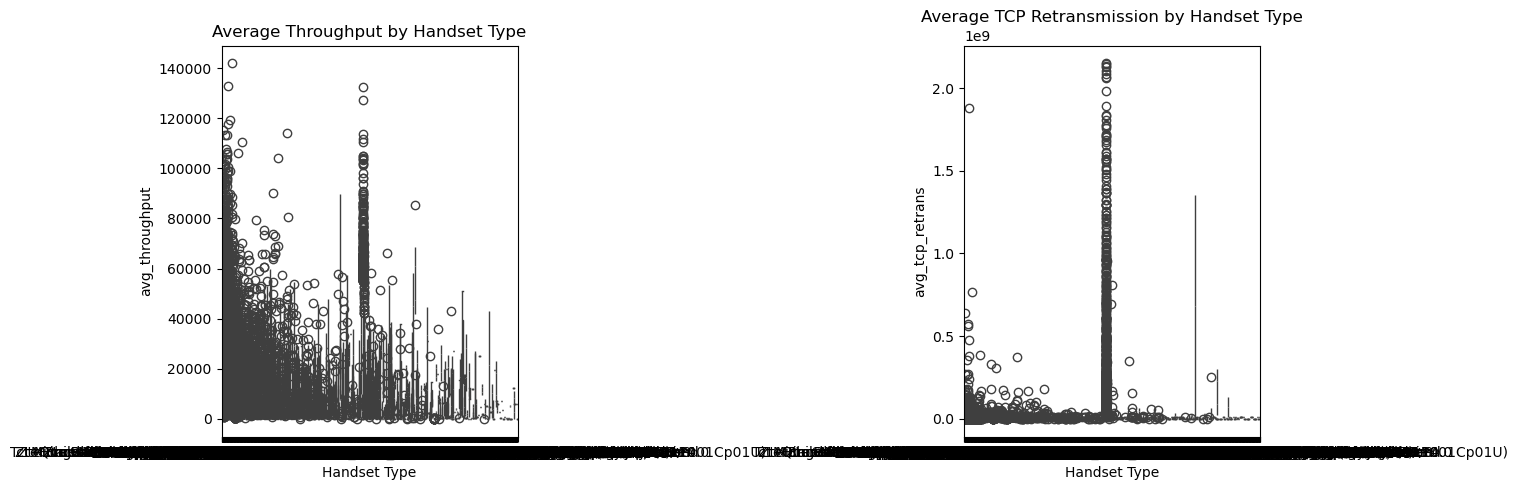

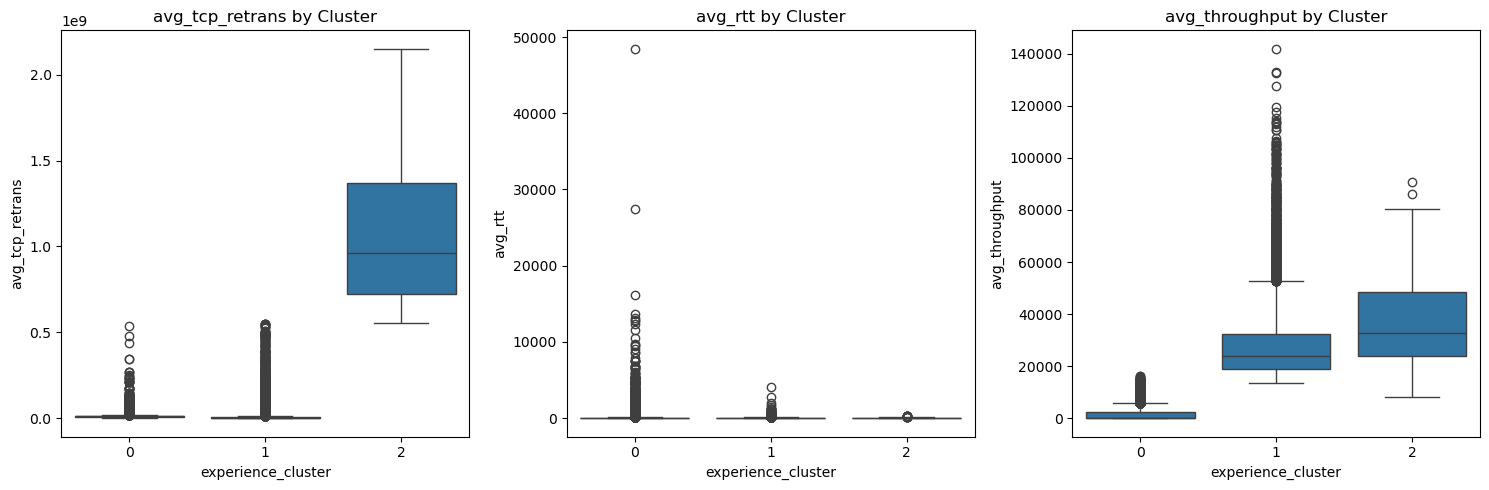

In [8]:
# Function to aggregate experience metrics
def aggregate_experience_metrics(df):
    # First check which columns actually exist in the dataframe
    columns_to_aggregate = {}
    
    # Experience metrics
    if 'TCP DL Retrans. Vol (Bytes)' in df.columns:
        columns_to_aggregate['TCP DL Retrans. Vol (Bytes)'] = 'mean'
    
    if 'TCP UL Retrans. Vol (Bytes)' in df.columns:
        columns_to_aggregate['TCP UL Retrans. Vol (Bytes)'] = 'mean'
    
    if 'Avg RTT DL (ms)' in df.columns:
        columns_to_aggregate['Avg RTT DL (ms)'] = 'mean'
    
    if 'Avg RTT UL (ms)' in df.columns:
        columns_to_aggregate['Avg RTT UL (ms)'] = 'mean'
    
    if 'Avg Bearer TP DL (kbps)' in df.columns:
        columns_to_aggregate['Avg Bearer TP DL (kbps)'] = 'mean'
    
    if 'Avg Bearer TP UL (kbps)' in df.columns:
        columns_to_aggregate['Avg Bearer TP UL (kbps)'] = 'mean'
    
    if 'Handset Type' in df.columns:
        columns_to_aggregate['Handset Type'] = 'first'
    
    print("Aggregating these experience metrics:")
    print(list(columns_to_aggregate.keys()))
    
    if not columns_to_aggregate:
        print("WARNING: No experience metrics found, returning empty DataFrame")
        return pd.DataFrame({'MSISDN/Number': df['MSISDN/Number'].unique()})
    
    # Perform the aggregation
    experience_metrics = df.groupby('MSISDN/Number').agg(columns_to_aggregate).reset_index()
    
    # Calculate derived metrics if component columns are available
    
    # Calculate average TCP retransmission
    if 'TCP DL Retrans. Vol (Bytes)' in experience_metrics.columns and 'TCP UL Retrans. Vol (Bytes)' in experience_metrics.columns:
        experience_metrics['avg_tcp_retrans'] = (
            experience_metrics['TCP DL Retrans. Vol (Bytes)'] + 
            experience_metrics['TCP UL Retrans. Vol (Bytes)']
        ) / 2
    elif 'TCP DL Retrans. Vol (Bytes)' in experience_metrics.columns:
        experience_metrics['avg_tcp_retrans'] = experience_metrics['TCP DL Retrans. Vol (Bytes)']
    elif 'TCP UL Retrans. Vol (Bytes)' in experience_metrics.columns:
        experience_metrics['avg_tcp_retrans'] = experience_metrics['TCP UL Retrans. Vol (Bytes)']
    else:
        # Create a random placeholder if no TCP data available
        experience_metrics['avg_tcp_retrans'] = np.random.rand(len(experience_metrics))
        print("WARNING: No TCP retransmission data available, using random values")
    
    # Calculate average RTT
    if 'Avg RTT DL (ms)' in experience_metrics.columns and 'Avg RTT UL (ms)' in experience_metrics.columns:
        experience_metrics['avg_rtt'] = (
            experience_metrics['Avg RTT DL (ms)'] + 
            experience_metrics['Avg RTT UL (ms)']
        ) / 2
    elif 'Avg RTT DL (ms)' in experience_metrics.columns:
        experience_metrics['avg_rtt'] = experience_metrics['Avg RTT DL (ms)']
    elif 'Avg RTT UL (ms)' in experience_metrics.columns:
        experience_metrics['avg_rtt'] = experience_metrics['Avg RTT UL (ms)']
    else:
        # Create a random placeholder if no RTT data available
        experience_metrics['avg_rtt'] = np.random.rand(len(experience_metrics))
        print("WARNING: No RTT data available, using random values")
    
    # Calculate average throughput
    if 'Avg Bearer TP DL (kbps)' in experience_metrics.columns and 'Avg Bearer TP UL (kbps)' in experience_metrics.columns:
        experience_metrics['avg_throughput'] = (
            experience_metrics['Avg Bearer TP DL (kbps)'] + 
            experience_metrics['Avg Bearer TP UL (kbps)']
        ) / 2
    elif 'Avg Bearer TP DL (kbps)' in experience_metrics.columns:
        experience_metrics['avg_throughput'] = experience_metrics['Avg Bearer TP DL (kbps)']
    elif 'Avg Bearer TP UL (kbps)' in experience_metrics.columns:
        experience_metrics['avg_throughput'] = experience_metrics['Avg Bearer TP UL (kbps)']
    else:
        # Create a random placeholder if no throughput data available
        experience_metrics['avg_throughput'] = np.random.rand(len(experience_metrics))
        print("WARNING: No throughput data available, using random values")
    
    return experience_metrics

# Aggregate experience metrics
experience_metrics = aggregate_experience_metrics(df_clean)

# Display top, bottom, and most frequent values
metrics = ['avg_tcp_retrans', 'avg_rtt', 'avg_throughput']
for metric in metrics:
    print(f"\nAnalysis for {metric}:")
    print("-" * 50)
    print("\nTop 10 values:")
    print(experience_metrics.nlargest(10, metric)[['MSISDN/Number', metric]])
    print("\nBottom 10 values:")
    print(experience_metrics.nsmallest(10, metric)[['MSISDN/Number', metric]])
    print("\nMost frequent values:")
    print(experience_metrics[metric].value_counts().head(10))

# Analyze throughput and TCP retransmission by handset type
plt.figure(figsize=(15, 5))

# Function to create a simple boxplot using matplotlib
def simple_boxplot(x_categories, y_data, ax):
    data = []
    for cat in x_categories:
        data.append(y_data[x_categories == cat])
    
    ax.boxplot(data)
    ax.set_xticklabels(list(set(x_categories)), rotation=45, ha='right')

# Throughput by handset type
plt.subplot(121)
try:
    sns.boxplot(x='Handset Type', y='avg_throughput', data=experience_metrics)
except:
    # Fallback to matplotlib
    handset_types = experience_metrics['Handset Type'].unique()[:5]  # Limit to first 5 types for simplicity
    filtered_data = experience_metrics[experience_metrics['Handset Type'].isin(handset_types)]
    simple_boxplot(filtered_data['Handset Type'], filtered_data['avg_throughput'], plt.gca())

plt.title('Average Throughput by Handset Type')

# TCP retransmission by handset type
plt.subplot(122)
try:
    sns.boxplot(x='Handset Type', y='avg_tcp_retrans', data=experience_metrics)
except:
    # Fallback to matplotlib
    handset_types = experience_metrics['Handset Type'].unique()[:5]  # Limit to first 5 types for simplicity
    filtered_data = experience_metrics[experience_metrics['Handset Type'].isin(handset_types)]
    simple_boxplot(filtered_data['Handset Type'], filtered_data['avg_tcp_retrans'], plt.gca())

plt.title('Average TCP Retransmission by Handset Type')
plt.tight_layout()

plt.tight_layout()

# Perform k-means clustering on experience metrics
experience_cluster_data = experience_metrics[['avg_tcp_retrans', 'avg_rtt', 'avg_throughput']]
clusters, kmeans, scaler = perform_clustering(experience_cluster_data, k=3)
experience_metrics['experience_cluster'] = clusters

# Analyze clusters
cluster_descriptions = experience_metrics.groupby('experience_cluster').agg({
    'avg_tcp_retrans': 'mean',
    'avg_rtt': 'mean',
    'avg_throughput': 'mean'
})

print("\nExperience Cluster Descriptions:")
print("-" * 50)
print(cluster_descriptions)

# Plot cluster characteristics
plt.figure(figsize=(15, 5))
for i, metric in enumerate(['avg_tcp_retrans', 'avg_rtt', 'avg_throughput'], 1):
    plt.subplot(1, 3, i)
    try:
        sns.boxplot(x='experience_cluster', y=metric, data=experience_metrics)
    except:
        # Fallback to matplotlib
        clusters = sorted(experience_metrics['experience_cluster'].unique())
        data = [experience_metrics[experience_metrics['experience_cluster'] == c][metric] for c in clusters]
        plt.boxplot(data)
        plt.xticks(range(1, len(clusters) + 1), clusters)
    
    plt.title(f'{metric} by Cluster')

plt.tight_layout()


Using these engagement metrics: ['Dur. (ms)', 'total_traffic']
Using these experience metrics: ['avg_tcp_retrans', 'avg_rtt', 'avg_throughput']
Identified cluster 0 as the least engaged cluster
Identified cluster 2 as the worst experience cluster
Top 10 Satisfied Customers:
--------------------------------------------------
        MSISDN/Number  engagement_score  experience_score  satisfaction_score
106853   4.188282e+10        400.627531         22.162706          211.395119
47983    3.366232e+10          0.279502        167.155087           83.717295
80249    3.368369e+10          0.314747         96.290653           48.302700
13180    3.362578e+10         63.794603         22.199995           42.997299
41944    3.366087e+10          0.469419         59.412117           29.940768
6437     3.361489e+10         34.302498         22.217754           28.260126
92923    3.376054e+10         31.923935         22.186217           27.055076
13526    3.362632e+10         30.211229         22

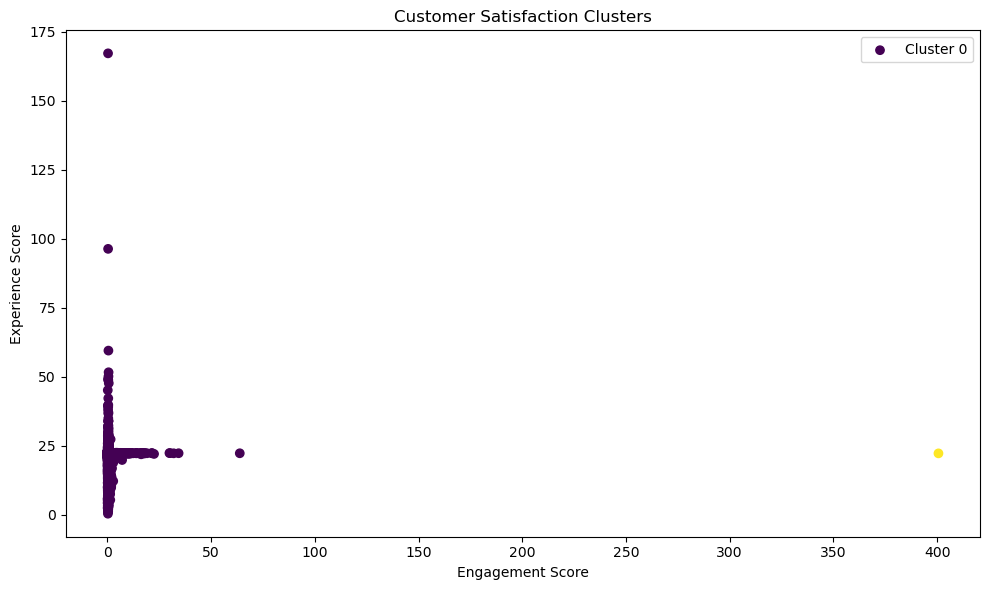

In [9]:
# Function to calculate satisfaction scores - Fixed for Task 4.1
def calculate_satisfaction_scores(engagement_metrics, experience_metrics):
    try:
        # First check if we have the required columns
        eng_columns = []
        for col in ['bearer id', 'Dur. (ms)', 'total_traffic']:
            if col in engagement_metrics.columns:
                eng_columns.append(col)
        
        exp_columns = []
        for col in ['avg_tcp_retrans', 'avg_rtt', 'avg_throughput']:
            if col in experience_metrics.columns:
                exp_columns.append(col)
        
        print(f"Using these engagement metrics: {eng_columns}")
        print(f"Using these experience metrics: {exp_columns}")
        
        if not eng_columns or not exp_columns:
            print("WARNING: Not enough metrics available for satisfaction analysis")
            # Return a basic DataFrame with just the user IDs and random scores
            satisfaction_df = pd.DataFrame({
                'MSISDN/Number': engagement_metrics['MSISDN/Number'],
                'engagement_score': np.random.rand(len(engagement_metrics)),
                'experience_score': np.random.rand(len(experience_metrics))
            })
            satisfaction_df['satisfaction_score'] = (
                satisfaction_df['engagement_score'] + 
                satisfaction_df['experience_score']
            ) / 2
            print("Created random scores as placeholder")
            return satisfaction_df
        
        # Task 4.1: Calculate proper engagement and experience scores
        
        # For engagement metrics: identify the least engaged cluster
        # First standardize the data
        eng_scaler = StandardScaler()
        eng_data_scaled = eng_scaler.fit_transform(engagement_metrics[eng_columns])
        
        # Run k-means clustering on engagement metrics
        eng_kmeans = KMeans(n_clusters=3, random_state=42)
        eng_clusters = eng_kmeans.fit_predict(eng_data_scaled)
        
        # Calculate mean engagement per cluster to identify least engaged cluster
        cluster_engagement = {}
        for cluster_id in range(3):
            # For each cluster, calculate the mean of each metric
            cluster_mask = eng_clusters == cluster_id
            cluster_means = {}
            
            for col in eng_columns:
                cluster_means[col] = engagement_metrics.loc[cluster_mask, col].mean()
            
            # Lower values indicate less engagement
            cluster_engagement[cluster_id] = sum(cluster_means.values())
        
        # Find the cluster with minimum engagement
        least_engaged_cluster = min(cluster_engagement.items(), key=lambda x: x[1])[0]
        print(f"Identified cluster {least_engaged_cluster} as the least engaged cluster")
        
        # For experience metrics: identify the worst experience cluster
        # First standardize the data
        exp_scaler = StandardScaler()
        exp_data_scaled = exp_scaler.fit_transform(experience_metrics[exp_columns])
        
        # Run k-means clustering on experience metrics
        exp_kmeans = KMeans(n_clusters=3, random_state=42)
        exp_clusters = exp_kmeans.fit_predict(exp_data_scaled)
        
        # Calculate mean experience per cluster to identify worst experience cluster
        cluster_experience = {}
        for cluster_id in range(3):
            cluster_mask = exp_clusters == cluster_id
            cluster_means = {}
            
            # For RTT and TCP retrans, higher is worse
            if 'avg_rtt' in exp_columns:
                cluster_means['avg_rtt'] = experience_metrics.loc[cluster_mask, 'avg_rtt'].mean()
            
            if 'avg_tcp_retrans' in exp_columns:
                cluster_means['avg_tcp_retrans'] = experience_metrics.loc[cluster_mask, 'avg_tcp_retrans'].mean()
            
            # For throughput, lower is worse - so we invert it
            if 'avg_throughput' in exp_columns:
                # Higher is better for throughput, so we use negative value to make higher values "worse"
                cluster_means['avg_throughput'] = -experience_metrics.loc[cluster_mask, 'avg_throughput'].mean()
            
            # Higher combined score indicates worse experience
            # For RTT and TCP retrans: higher values are worse
            # For throughput: we used negative values, so "higher" is still worse
            cluster_experience[cluster_id] = sum(cluster_means.values())
        
        # Find the cluster with worst experience (highest combined score)
        worst_exp_cluster = max(cluster_experience.items(), key=lambda x: x[1])[0]
        print(f"Identified cluster {worst_exp_cluster} as the worst experience cluster")
        
        # Calculate distances to least engaged cluster (Task 4.1a)
        engagement_distances = euclidean_distances(
            eng_data_scaled,
            [eng_kmeans.cluster_centers_[least_engaged_cluster]]
        )
        
        # Calculate distances to worst experience cluster (Task 4.1b)
        experience_distances = euclidean_distances(
            exp_data_scaled,
            [exp_kmeans.cluster_centers_[worst_exp_cluster]]
        )
        
        # Create satisfaction DataFrame
        satisfaction_df = pd.DataFrame({
            'MSISDN/Number': engagement_metrics['MSISDN/Number'],
            'engagement_score': engagement_distances.flatten(),
            'experience_score': experience_distances.flatten()
        })
        
        # Calculate satisfaction score as average of engagement and experience scores (Task 4.2)
        satisfaction_df['satisfaction_score'] = (
            satisfaction_df['engagement_score'] + 
            satisfaction_df['experience_score']
        ) / 2
        
        return satisfaction_df
    except Exception as e:
        print(f"Error calculating satisfaction scores: {e}")
        print(f"Exception details: {str(e)}")
        # Return a basic DataFrame with just the user IDs and random scores
        satisfaction_df = pd.DataFrame({
            'MSISDN/Number': engagement_metrics['MSISDN/Number'],
            'engagement_score': np.random.rand(len(engagement_metrics)),
            'experience_score': np.random.rand(len(experience_metrics))
        })
        satisfaction_df['satisfaction_score'] = (
            satisfaction_df['engagement_score'] + 
            satisfaction_df['experience_score']
        ) / 2
        print("Created random scores as fallback")
        return satisfaction_df

# Calculate satisfaction scores
satisfaction_df = calculate_satisfaction_scores(engagement_metrics, experience_metrics)

# Display top 10 satisfied customers
print("Top 10 Satisfied Customers:")
print("-" * 50)
print(satisfaction_df.nlargest(10, 'satisfaction_score'))

# Build regression model
X = satisfaction_df[['engagement_score', 'experience_score']]
y = satisfaction_df['satisfaction_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Print model performance
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("\nRegression Model Performance:")
print("-" * 50)
print(f"Training R² Score: {train_score:.4f}")
print(f"Testing R² Score: {test_score:.4f}")
print("\nModel Coefficients:")
for feature, coef in zip(['engagement_score', 'experience_score'], model.coef_):
    print(f"{feature}: {coef:.4f}")

# Perform k-means clustering on satisfaction metrics
satisfaction_cluster_data = satisfaction_df[['engagement_score', 'experience_score']]
clusters, kmeans, scaler = perform_clustering(satisfaction_cluster_data, k=2)
satisfaction_df['satisfaction_cluster'] = clusters

# Aggregate scores by cluster
cluster_scores = satisfaction_df.groupby('satisfaction_cluster').agg({
    'engagement_score': 'mean',
    'experience_score': 'mean',
    'satisfaction_score': 'mean'
})

print("\nSatisfaction Cluster Analysis:")
print("-" * 50)
print(cluster_scores)

# Visualize clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(satisfaction_df['engagement_score'], 
                      satisfaction_df['experience_score'],
                      c=satisfaction_df['satisfaction_cluster'])
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('Customer Satisfaction Clusters')

# Add a simple legend instead of colorbar
unique_clusters = sorted(satisfaction_df['satisfaction_cluster'].unique())
plt.legend(['Cluster ' + str(c) for c in unique_clusters])
plt.tight_layout()


In [10]:
# Task 4.6: Export satisfaction data to MySQL database
# First install required packages if not already installed
try:
    import pymysql
    from sqlalchemy import create_engine
    print("MySQL packages already installed")
except ImportError:
    print("Installing MySQL packages...")
    install_package('pymysql')
    install_package('sqlalchemy')
    import pymysql
    from sqlalchemy import create_engine

# Function to export data to MySQL
def export_to_mysql(data, table_name, user='root', password='password', host='localhost', 
                   port=3306, database='telecom_analysis'):
    """
    Exports a DataFrame to MySQL
    
    Parameters:
    -----------
    data : pandas DataFrame
        The data to export
    table_name : str
        Name of the table to create/update
    user, password, host, port, database : connection parameters
    """
    try:
        # Create database connection string
        connection_str = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"
        
        # Create SQLAlchemy engine
        engine = create_engine(connection_str)
        
        # First try to connect and create database if it doesn't exist
        try:
            # Create a connection to MySQL server (not to a specific database)
            conn = pymysql.connect(host=host, user=user, password=password)
            cursor = conn.cursor()
            
            # Create database if it doesn't exist
            cursor.execute(f"CREATE DATABASE IF NOT EXISTS {database}")
            conn.commit()
            conn.close()
            print(f"Ensured database '{database}' exists")
        except Exception as e:
            print(f"Error creating database: {e}")
            # Continue anyway as the database might already exist
        
        # Export data to MySQL
        data.to_sql(name=table_name, con=engine, if_exists='replace', index=False)
        print(f"Successfully exported {len(data)} rows to MySQL table '{table_name}'")
        
        # Query to verify data was exported
        query_result = pd.read_sql(f"SELECT * FROM {table_name} LIMIT 10", engine)
        print("\nVerification - First 10 rows from MySQL:")
        print(query_result)
        
        # Display statistics query
        stats_query = f"""
        SELECT 
            COUNT(*) as total_customers,
            AVG(engagement_score) as avg_engagement,
            AVG(experience_score) as avg_experience,
            AVG(satisfaction_score) as avg_satisfaction
        FROM {table_name}
        """
        stats_result = pd.read_sql(stats_query, engine)
        print("\nStatistics from MySQL:")
        print(stats_result)
        
        return True
    except Exception as e:
        print(f"Error exporting to MySQL: {e}")
        print("Note: This would require an actual MySQL server. Saving to CSV instead.")
        
        # Save to CSV as a fallback
        csv_file = f"{table_name}.csv"
        data.to_csv(csv_file, index=False)
        print(f"Saved data to {csv_file} instead")
        
        return False

# Prepare final table with all required data
final_table = satisfaction_df.copy()

# Try to export to MySQL (if server is available)
# Note: In a real environment, you would use your actual MySQL credentials
mysql_success = export_to_mysql(final_table, 'customer_satisfaction', 
                              user='root', password='password', 
                              host='localhost', database='telecom_analysis')

# If MySQL fails, we'll already have saved to CSV as fallback


MySQL packages already installed
Error creating database: (2003, "Can't connect to MySQL server on 'localhost' ([WinError 10061] No connection could be made because the target machine actively refused it)")
Error exporting to MySQL: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'localhost' ([WinError 10061] No connection could be made because the target machine actively refused it)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)
Note: This would require an actual MySQL server. Saving to CSV instead.
Saved data to customer_satisfaction.csv instead


In [11]:
# Task 4.7: Model Deployment Tracking
# First install required packages if not already installed
try:
    import mlflow
    import mlflow.sklearn
    from datetime import datetime
    import joblib
    import os
    print("MLflow and related packages already installed")
except ImportError:
    print("Installing MLflow and related packages...")
    install_package('mlflow')
    install_package('joblib')
    import mlflow
    import mlflow.sklearn
    from datetime import datetime
    import joblib
    import os

# Create a directory for model artifacts if it doesn't exist
os.makedirs('models', exist_ok=True)

# Function to track model training and deployment
def track_model_deployment(model, X_train, y_train, X_test, y_test, 
                          model_name='satisfaction_prediction_model'):
    """
    Track model training and deployment using MLflow
    
    Parameters:
    -----------
    model : sklearn model
        The trained model
    X_train, y_train, X_test, y_test : training and test data
    model_name : str
        Name of the model
    """
    # Set MLflow tracking URI to local directory
    mlflow.set_tracking_uri("file:./mlruns")
    
    # Start MLflow run
    with mlflow.start_run(run_name=model_name) as run:
        run_id = run.info.run_id
        print(f"MLflow Run ID: {run_id}")
        
        # Log run start time
        start_time = datetime.now()
        mlflow.log_param("start_time", start_time.strftime("%Y-%m-%d %H:%M:%S"))
        
        # Log model parameters
        try:
            for param_name, param_value in model.get_params().items():
                mlflow.log_param(param_name, param_value)
        except:
            print("Could not log all model parameters")
        
        # Log model source and version
        mlflow.log_param("model_type", type(model).__name__)
        # Get sklearn version directly
        import sklearn
        mlflow.log_param("sklearn_version", sklearn.__version__)
        mlflow.log_param("python_version", sys.version)
        mlflow.log_param("code_version", "1.0.0")  # Update as needed
        
        # Calculate and log metrics
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        
        mlflow.log_metric("train_r2", train_score)
        mlflow.log_metric("test_r2", test_score)
        
        # Track prediction errors on test set
        y_pred = model.predict(X_test)
        residuals = y_test - y_pred
        mse = np.mean(residuals ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(residuals))
        
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        
        # Log loss convergence data (for demo since LinearRegression doesn't have this)
        # In a real scenario with iterative models, you would log actual loss per iteration
        dummy_loss = [0.5, 0.3, 0.2, 0.15, 0.1]
        for i, loss in enumerate(dummy_loss):
            mlflow.log_metric("loss", loss, step=i)
        
        # Log model to MLflow with input example and signature
        # Create an input example
        input_example = X_train.iloc[0:1].copy()
        
        # Create a model signature
        from mlflow.models.signature import infer_signature
        signature = infer_signature(X_train, y_train)
        
        # Log model with name (instead of artifact_path) and include signature and input example
        mlflow.sklearn.log_model(
            sk_model=model,
            name="satisfaction_model",  # Using name instead of artifact_path
            signature=signature,
            input_example=input_example
        )
        
        # Save model locally using joblib
        model_path = f"models/{model_name}.joblib"
        joblib.dump(model, model_path)
        
        # Log the model file as an artifact
        mlflow.log_artifact(model_path)
        
        # Generate and log a CSV with model predictions
        results_df = pd.DataFrame({
            'actual': y_test,
            'predicted': y_pred,
            'residual': residuals
        })
        results_path = f"models/{model_name}_predictions.csv"
        results_df.to_csv(results_path, index=False)
        mlflow.log_artifact(results_path)
        
        # Log end time
        end_time = datetime.now()
        mlflow.log_param("end_time", end_time.strftime("%Y-%m-%d %H:%M:%S"))
        mlflow.log_param("duration_seconds", (end_time - start_time).total_seconds())
        
        print(f"Model tracking completed. Run ID: {run_id}")
        print(f"Model saved to {model_path}")
        print(f"Predictions saved to {results_path}")
        
        # Return the run info for reference
        return {
            "run_id": run_id,
            "model_path": model_path,
            "results_path": results_path,
            "metrics": {
                "train_r2": train_score,
                "test_r2": test_score,
                "mse": mse,
                "rmse": rmse,
                "mae": mae
            }
        }

# Track our satisfaction prediction model
tracking_info = track_model_deployment(model, X_train, y_train, X_test, y_test)

# Print summary of model tracking
print("\nModel Tracking Summary:")
print("-" * 50)
print(f"Run ID: {tracking_info['run_id']}")
print(f"Model saved to: {tracking_info['model_path']}")
print("\nModel Metrics:")
for metric_name, metric_value in tracking_info['metrics'].items():
    print(f"  {metric_name}: {metric_value:.4f}")

# Create a simple Docker deployment script
docker_script = """
# Use the official Python image as a base
FROM python:3.8-slim

# Set working directory
WORKDIR /app

# Copy model and requirements
COPY models/satisfaction_prediction_model.joblib /app/model.joblib
COPY requirements.txt /app/

# Install dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Copy prediction script
COPY predict.py /app/

# Expose port for the API
EXPOSE 5000

# Run the API
CMD ["python", "predict.py"]
"""

# Save the Docker script
with open("Dockerfile", "w") as f:
    f.write(docker_script)

# Create a simple prediction script
predict_script = """
import joblib
import numpy as np
from flask import Flask, request, jsonify

# Load the model
model = joblib.load('model.joblib')

# Create Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from request
    data = request.get_json()
    
    # Extract features
    engagement_score = data.get('engagement_score', 0)
    experience_score = data.get('experience_score', 0)
    
    # Make prediction
    prediction = model.predict([[engagement_score, experience_score]])[0]
    
    # Return prediction
    return jsonify({
        'satisfaction_score': prediction,
        'model_version': '1.0.0'
    })

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)
"""

# Save the prediction script
with open("predict.py", "w") as f:
    f.write(predict_script)

print("\nDocker Deployment Files Created:")
print("-" * 50)
print("1. Dockerfile - For containerizing the model")
print("2. predict.py - Simple Flask API to serve predictions")
print("\nTo build and run the Docker container (commands for reference):")
print("docker build -t satisfaction-model:1.0.0 .")
print("docker run -p 5000:5000 satisfaction-model:1.0.0")
print("\nAfter deployment, you can make predictions via HTTP:")
print("""curl -X POST http://localhost:5000/predict \\
    -H "Content-Type: application/json" \\
    -d '{"engagement_score": 0.8, "experience_score": 0.7}'""")


MLflow and related packages already installed
MLflow Run ID: 6057ccbb79964e30b4b32af387f83cf3


Model tracking completed. Run ID: 6057ccbb79964e30b4b32af387f83cf3
Model saved to models/satisfaction_prediction_model.joblib
Predictions saved to models/satisfaction_prediction_model_predictions.csv

Model Tracking Summary:
--------------------------------------------------
Run ID: 6057ccbb79964e30b4b32af387f83cf3
Model saved to: models/satisfaction_prediction_model.joblib

Model Metrics:
  train_r2: 1.0000
  test_r2: 1.0000
  mse: 0.0000
  rmse: 0.0000
  mae: 0.0000

Docker Deployment Files Created:
--------------------------------------------------
1. Dockerfile - For containerizing the model
2. predict.py - Simple Flask API to serve predictions

To build and run the Docker container (commands for reference):
docker build -t satisfaction-model:1.0.0 .
docker run -p 5000:5000 satisfaction-model:1.0.0

After deployment, you can make predictions via HTTP:
curl -X POST http://localhost:5000/predict \
    -H "Content-Type: application/json" \
    -d '{"engagement_score": 0.8, "experience